<a href="https://colab.research.google.com/github/dailycodepython/Stock_Market_Future_Spread_Prediction_Using_Pycaret/blob/main/Bond_Duration_and_Convexity_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дюрация показывает изменение цены облигации в процентном выражении относительно изменения ставок, независимо от того, растут ставки или падают. Показатель дюрации отражает только приблизительное изменение цены из-за того, что отношение между ценой и доходностью не является линейным. График цена/доходность имеет выпуклую форму, как показано на рисунке ниже. Поэтому, чем значительнее изменение доходности облигации, тем больше расхождение между фактической ценой и теоретической, полученной на основе PVBP

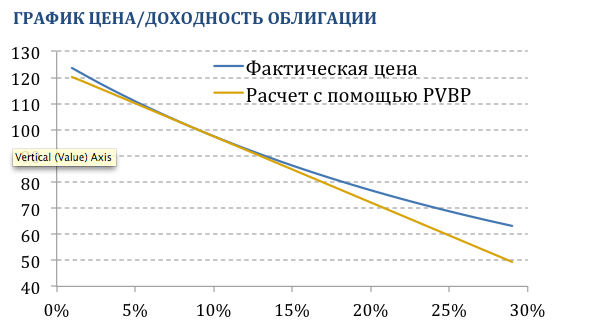

PVBP является коэффициентом наклона касательной линии в определенной точке. Например, при доходности к погашению 9% цена облигации составляет $100. В данной точке модифицированная дюрация равна 2,531%, т.е. коэффициент наклона касательной линии в данной точке равен минус 0,02531. Отметим, что PVBP не является постоянной величиной. С практической точки зрения это означает, что фактическое изменение цены облигации на 10 или 50 базисных пунктов будет отличаться от значения, которое показывает PVBP.

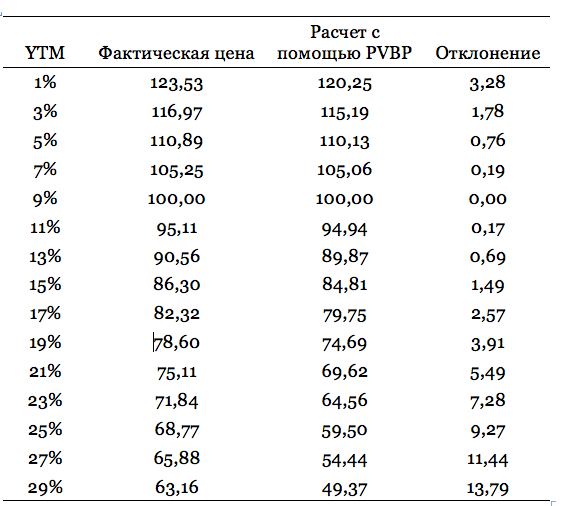

Дюрация – это первая производная от цены облигации относительно доходности. Инвесторы и трейдеры обычно используют дюрацию для вычисления процентного риска при небольших колебаниях доходности. Показатель процентного риска можно улучшить с помощью производной 2-ой степени – конвекции, если принять в расчет выпуклую форму графика цена/доходность. (О математической стороне дюрации и конвекции в статье: Математическое объяснение дюрации и конвекции).



Владелец обыкновенной облигации имеет положительную конвекцию, которая является преимуществом. При росте (падении) доходности цена облигации упадет (вырастет) меньше (сильнее), чем указывает дюрация. Поэтому, конвекция помогает как при падении доходности, так и при ее росте.





Расчет конвекции



Конвекция облигации определяется следующим образом:

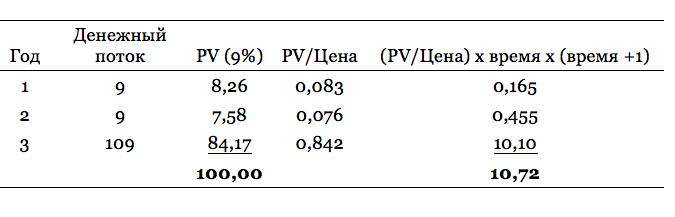

Завершающий шаг:

Конвекция = 10,72 / (1 + YTM)^2 = 10,72 / (1 + 0,09)^2 = 9,022



Полученное значение 9,022 можно использовать для измерения влияния выпуклости на цену облигации с помощью формулы:

0,5 x (изменение доходности)^2 x Конвекция x 100



При изменении доходности на 100 базисных пунктов, т.е. 1%, эффект от конвекции составит:

0,5 x (0,01)^2 x 9,022 x 100 = 0,0451%



Используя модифицированную дюрацию и конвекцию, получаем, что при падении доходности облигации на 1% цена облигации вырастет на:



Модифицированная дюрация        2,531%

Конвекция                                             0,0451%

=Изменение цены                               2,576%



Несмотря на ошибки при округлении, этот результат намного ближе к фактическому изменению цены – 2,58% – чем, если бы мы опирались на одну дюрацию. Используя модифицированную дюрацию и конвекцию, получаем, что при повышении доходности облигации на 1% цена облигации снизится на:



Модифицированная дюрация        -2,531%

Конвекция                                             0,045%

=Изменение цены                                -2,486%

Поведение дюрации и конвекции

В таблице 3 указаны облигации, которые имеют одинаковую доходность 10%, но разные купонные выплаты и срок до погашения. Модифицированная дюрация и конвекция в таблице отражают изменение цены облигации при изменении доходности выпуска на 1%. (Подробно о разных видах доходностей в Доходности облигаций – YTM, YTC, YTW и current yield).

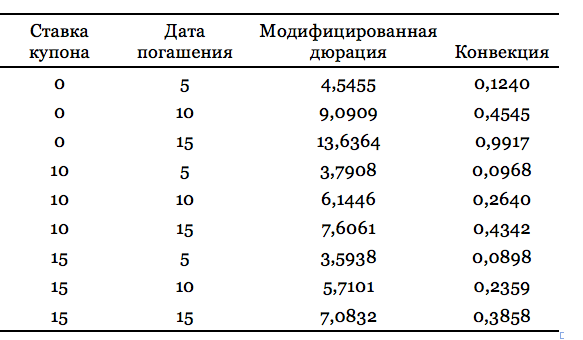



Выводы

1) Чем ниже купон и больше срок до погашения, тем выше дюрация

2) Чем ниже купон и больше срок до погашения, тем выше конвекция



Как было отмечено ранее, обыкновенные облигации без опциона обладают положительной конвекцией. Поэтому, в случае роста доходности цена долговой бумаги падает в меньшей степени, а при снижении доходности цена растет быстрее, чем указывает дюрация. Из этого следует, что если две облигации содержат в себе одинаковый кредитный риск и срок до погашения, то облигация с более высокой конвекцией должна иметь меньшую доходность.

In [ ]:
!pip install numpy_financial

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import numpy_financial as npf

#Defining a function for calculate to duration
def calculate_duration(coupon_rate, maturity, interest_rate, coupon_freq, bps_scenario):
    periods = int(maturity * coupon_freq) + 1  # Ensure periods is an integer #How many coupon payment periods that we have?
    cash_flows = np.zeros(periods) # Initiliazie the array of cashflows
    cash_flows[0] = npf.pv(rate=interest_rate/coupon_freq, nper=periods-1, pmt=coupon_rate*100/coupon_freq, fv=100) #Calculating present value of bond
    cash_flows[1:-1] = coupon_rate/coupon_freq*100
    cash_flow_per_period = cash_flows[1]
    cash_flows[-1] = cash_flow_per_period + 100 #Add the face value of the bond to the last cash flow
    #Prepare dataframe for our model
    df = pd.DataFrame({
        'Period': range(periods),
        'Cash_Flow': cash_flows,
        'Present_Value': 0,
        'Duration': 0,
        "Convexity": 0
    })
    #Loop over for calculations
    for i in range(1, periods):
        df.loc[i, 'Present_Value'] = df.loc[i, 'Cash_Flow'] / (1 + interest_rate/coupon_freq)**i
    for i in range(1, periods):
        df.loc[i, 'Duration'] = i * df.loc[i, 'Present_Value']
    for i in range(1,periods):
        df.loc[i, 'Convexity'] = 1/(1+interest_rate/coupon_freq)**2*df.loc[i, 'Present_Value']*(df.loc[i, 'Period']**2+df.loc[i, 'Period'])

    #Calculating results with formulas
    macaulay_duration = df['Duration'].sum() / df['Present_Value'].sum() / coupon_freq
    modified_duration = macaulay_duration / (1 + interest_rate/coupon_freq)
    duration_effect = -modified_duration * bps_scenario / 10000 * df['Present_Value'].sum()
    convexity = df['Convexity'].sum() / df['Present_Value'].sum() / coupon_freq**2
    convexity_effect = 0.5 * convexity * (bps_scenario/10000)**2 * df['Present_Value'].sum()
    duration_convexity_effect = duration_effect + convexity_effect
    new_bond_price = df['Present_Value'].sum() + duration_convexity_effect
    print(f"Present value of your bond is {df['Present_Value'].sum():.2f}")
    print(f"Macaulay duration of your bond is {macaulay_duration:.2f}")
    print(f"Modified duration of your bond is {modified_duration:.2f}")
    print(f"Modified duration effect of {bps_scenario} bps increase of the bond yield is {duration_effect:.2f}")
    print(f"Convexity effect of {bps_scenario} bps increase of the bond yield is {convexity_effect:.2f}")
    print(f"Total convexity and duration effect of {bps_scenario} bps increase of the bond yield is {duration_convexity_effect:.2f} and new present value of the bond price is {new_bond_price:.2f}")
    return df

calculate_duration(coupon_rate=0.1225, maturity=5632/365, interest_rate=0.1765, coupon_freq=2, bps_scenario=600)

Present value of your bond is 71.82
Macaulay duration of your bond is 5.99
Modified duration of your bond is 5.51
Modified duration effect of 600 bps increase of the bond yield is -23.73
Convexity effect of 600 bps increase of the bond yield is 6.70
Total convexity and duration effect of 600 bps increase of the bond yield is -17.03 and new present value of the bond price is 54.79


<ipython-input-2-c2182245da46>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.628302320238916' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Present_Value'] = df.loc[i, 'Cash_Flow'] / (1 + interest_rate/coupon_freq)**i
<ipython-input-2-c2182245da46>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.628302320238916' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Duration'] = i * df.loc[i, 'Present_Value']
<ipython-input-2-c2182245da46>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.504954915035997' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Convexity'] = 1/(1+interest_r

,Period,Cash_Flow,Present_Value,Duration,Convexity
0,0,-71.824951,0.000000,0.000000,0.000000
1,1,6.125000,5.628302,5.628302,9.504955
2,2,6.125000,5.171884,10.343767,26.202495
3,3,6.125000,4.752477,14.257432,48.155285
4,4,6.125000,4.367082,17.468330,73.750341
5,5,6.125000,4.012940,20.064702,101.654502
6,6,6.125000,3.687517,22.125102,130.775376
7,7,6.125000,3.388483,23.719384,160.227124
8,8,6.125000,3.113699,24.909595,189.300531
9,9,6.125000,2.861199,25.750788,217.436860


In [ ]:
16.2/71

0.22816901408450704

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import numpy_financial as npf

#Defining a function for calculate to duration
def calculate_duration(coupon_rate, maturity, interest_rate, coupon_freq, bps_scenario):
    periods = int(maturity * coupon_freq) + 1  # Ensure periods is an integer #How many coupon payment periods that we have?
    cash_flows = np.zeros(periods) # Initiliazie the array of cashflows
    cash_flows[0] = npf.pv(rate=interest_rate/coupon_freq, nper=periods-1, pmt=coupon_rate*100/coupon_freq, fv=100) #Calculating present value of bond
    cash_flows[1:-1] = coupon_rate/coupon_freq*100
    cash_flow_per_period = cash_flows[1]
    cash_flows[-1] = cash_flow_per_period + 100 #Add the face value of the bond to the last cash flow
    #Prepare dataframe for our model
    df = pd.DataFrame({
        'Period': range(periods),
        'Cash_Flow': cash_flows,
        'Present_Value': 0,
        'Duration': 0,
        "Convexity": 0
    })
    #Loop over for calculations
    for i in range(1, periods):
        df.loc[i, 'Present_Value'] = df.loc[i, 'Cash_Flow'] / (1 + interest_rate/coupon_freq)**i
    for i in range(1, periods):
        df.loc[i, 'Duration'] = i * df.loc[i, 'Present_Value']
    for i in range(1,periods):
        df.loc[i, 'Convexity'] = 1/(1+interest_rate/coupon_freq)**2*df.loc[i, 'Present_Value']*(df.loc[i, 'Period']**2+df.loc[i, 'Period'])

    #Calculating results with formulas
    macaulay_duration = df['Duration'].sum() / df['Present_Value'].sum() / coupon_freq
    modified_duration = macaulay_duration / (1 + interest_rate/coupon_freq)
    duration_effect = -modified_duration * bps_scenario / 10000 * df['Present_Value'].sum()
    convexity = df['Convexity'].sum() / df['Present_Value'].sum() / coupon_freq**2
    convexity_effect = 0.5 * convexity * (bps_scenario/10000)**2 * df['Present_Value'].sum()
    duration_convexity_effect = duration_effect + convexity_effect
    new_bond_price = df['Present_Value'].sum() + duration_convexity_effect
    print(f"Present value of your bond is {df['Present_Value'].sum():.2f}")
    print(f"Macaulay duration of your bond is {macaulay_duration:.2f}")
    print(f"Modified duration of your bond is {modified_duration:.2f}")
    print(f"Modified duration effect of {bps_scenario} bps increase of the bond yield is {duration_effect:.2f}")
    print(f"Convexity effect of {bps_scenario} bps increase of the bond yield is {convexity_effect:.2f}")
    print(f"Total convexity and duration effect of {bps_scenario} bps increase of the bond yield is {duration_convexity_effect:.2f} and new present value of the bond price is {new_bond_price:.2f}")
    return df

calculate_duration(coupon_rate=0.09, maturity=1722/365, interest_rate=0.1831, coupon_freq=2, bps_scenario=200)

Present value of your bond is 72.27
Macaulay duration of your bond is 3.65
Modified duration of your bond is 3.34
Modified duration effect of 200 bps increase of the bond yield is -4.83
Convexity effect of 200 bps increase of the bond yield is 0.21
Total convexity and duration effect of 200 bps increase of the bond yield is -4.63 and new present value of the bond price is 67.64


<ipython-input-4-545306e7e8fd>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.122577985433558' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Present_Value'] = df.loc[i, 'Cash_Flow'] / (1 + interest_rate/coupon_freq)**i
<ipython-input-4-545306e7e8fd>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.122577985433558' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Duration'] = i * df.loc[i, 'Present_Value']
<ipython-input-4-545306e7e8fd>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.920087844902065' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, 'Convexity'] = 1/(1+interest_r

,Period,Cash_Flow,Present_Value,Duration,Convexity
0,0,-72.267123,0.000000,0.000000,0.000000
1,1,4.500000,4.122578,4.122578,6.920088
2,2,4.500000,3.776811,7.553622,19.019068
3,3,4.500000,3.460044,10.380132,34.847818
4,4,4.500000,3.169845,12.679379,53.208462
5,5,4.500000,2.903985,14.519924,73.118678
6,6,4.500000,2.660423,15.962539,93.780541
7,7,4.500000,2.437289,17.061025,114.553361
8,8,4.500000,2.232870,17.862960,134.930047
9,9,104.500000,47.503279,427.529507,3588.218047


In [ ]:
def calculate_duration(coupon_rate, maturity, interest_rate, coupon_freq, bps_scenario):
    periods = int(maturity * coupon_freq) + 1  # Ensure periods is an integer #How many coupon payment periods that we have?
    cash_flows = np.zeros(periods) # Initiliazie the array of cashflows
    cash_flows[0] = npf.pv(rate=interest_rate/coupon_freq, nper=periods-1, pmt=coupon_rate*100/coupon_freq, fv=100) #Calculating present value of bond
    cash_flows[1:-1] = coupon_rate/coupon_freq*100
    cash_flow_per_period = cash_flows[1]
    cash_flows[-1] = cash_flow_per_period + 100 #Add the face value of the bond to the last cash flow
    #Prepare dataframe for our model
    df = pd.DataFrame({
        'Period': range(periods),
        'Cash_Flow': cash_flows,
        'Present_Value': 0,
        'Duration': 0,
        "Convexity": 0
    })
    #Loop over for calculations
    for i in range(1, periods):
        df.loc[i, 'Present_Value'] = df.loc[i, 'Cash_Flow'] / (1 + interest_rate/coupon_freq)**i
    for i in range(1, periods):
        df.loc[i, 'Duration'] = i * df.loc[i, 'Present_Value']
    for i in range(1,periods):
        df.loc[i, 'Convexity'] = 1/(1+interest_rate/coupon_freq)**2*df.loc[i, 'Present_Value']*(df.loc[i, 'Period']**2+df.loc[i, 'Period'])

    #Calculating results with formulas
    macaulay_duration = df['Duration'].sum() / df['Present_Value'].sum() / coupon_freq
    modified_duration = macaulay_duration / (1 + interest_rate/coupon_freq)
    duration_effect = -modified_duration * bps_scenario / 10000 * df['Present_Value'].sum()
    convexity = df['Convexity'].sum() / df['Present_Value'].sum() / coupon_freq**2
    convexity_effect = 0.5 * convexity * (bps_scenario/10000)**2 * df['Present_Value'].sum()
    duration_convexity_effect = duration_effect + convexity_effect
    new_bond_price = df['Present_Value'].sum() + duration_convexity_effect
    print(f"Present value of your bond is {df['Present_Value'].sum():.2f}")
    print(f"Macaulay duration of your bond is {macaulay_duration:.2f}")
    print(f"Modified duration of your bond is {modified_duration:.2f}")
    print(f"Modified duration effect of {bps_scenario} bps increase of the bond yield is {duration_effect:.2f}")
    print(f"Convexity effect of {bps_scenario} bps increase of the bond yield is {convexity_effect:.2f}")
    print(f"Total convexity and duration effect of {bps_scenario} bps increase of the bond yield is {duration_convexity_effect:.2f} and new present value of the bond price is {new_bond_price:.2f}")
    return df

calculate_duration(coupon_rate=0.17, maturity=44/365, interest_rate=0.20, coupon_freq=2, bps_scenario=200)

IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
№2900

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import numpy_financial as npf

# Defining a function to calculate the duration and other metrics of a bond
def calculate_duration(coupon_rate, maturity, interest_rate, coupon_freq, bps_scenario):
    # Calculate the total number of coupon payment periods
    periods = int(maturity * coupon_freq) + 1  # Ensure periods is an integer
    cash_flows = np.zeros(periods)  # Initialize the array of cash flows

    # Calculate the present value of the bond
    cash_flows[0] = npf.pv(rate=interest_rate/coupon_freq, nper=periods-1,
                           pmt=coupon_rate * 100 / coupon_freq, fv=100)

    # Fill in the cash flows for each coupon payment
    cash_flows[1:-1] = coupon_rate / coupon_freq * 100
    cash_flow_per_period = cash_flows[1]
    cash_flows[-1] = cash_flow_per_period + 100  # Add the face value of the bond to the last cash flow

    # Prepare a DataFrame for our model
    df = pd.DataFrame({
        'Period': range(periods),
        'Cash_Flow': cash_flows,
        'Present_Value': 0,
        'Duration': 0,
        'Convexity': 0
    })

    # Loop to calculate present value, duration, and convexity
    for i in range(1, periods):
        df.loc[i, 'Present_Value'] = df.loc[i, 'Cash_Flow'] / (1 + interest_rate / coupon_freq) ** i

    for i in range(1, periods):
        df.loc[i, 'Duration'] = i * df.loc[i, 'Present_Value']

    for i in range(1, periods):
        df.loc[i, 'Convexity'] = (1 / (1 + interest_rate / coupon_freq) ** 2) * df.loc[i, 'Present_Value'] * (df.loc[i, 'Period'] ** 2 + df.loc[i, 'Period'])

    # Calculating results with formulas
    macaulay_duration = df['Duration'].sum() / df['Present_Value'].sum() / coupon_freq
    modified_duration = macaulay_duration / (1 + interest_rate / coupon_freq)
    duration_effect = -modified_duration * bps_scenario / 10000 * df['Present_Value'].sum()
    convexity = df['Convexity'].sum() / df['Present_Value'].sum() / coupon_freq ** 2
    convexity_effect = 0.5 * convexity * (bps_scenario / 10000) ** 2 * df['Present_Value'].sum()
    duration_convexity_effect = duration_effect + convexity_effect
    new_bond_price = df['Present_Value'].sum() + duration_convexity_effect

    # Print results
    print(f"Present value of your bond is {df['Present_Value'].sum():.2f}")
    print(f"Macaulay duration of your bond is {macaulay_duration:.2f}")
    print(f"Modified duration of your bond is {modified_duration:.2f}")
    print(f"Modified duration effect of {bps_scenario} bps increase of the bond yield is {duration_effect:.2f}")
    print(f"Convexity effect of {bps_scenario} bps increase of the bond yield is {convexity_effect:.2f}")
    print(f"Total convexity and duration effect of {bps_scenario} bps increase of the bond yield is {duration_convexity_effect:.2f} and new present value of the bond price is {new_bond_price:.2f}")

    return df

# Example usage of the function
calculate_duration(coupon_rate=0.045, maturity=215/365, interest_rate=0.192, coupon_freq=2, bps_scenario=200)

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import numpy_financial as npf

#Defining a function for calculate to duration
def calculate_duration(coupon_rate, maturity, interest_rate, coupon_freq, bps_scenario):
    periods = maturity * coupon_freq + 1 #How many coupon payment periods that we have?
    cash_flows = np.zeros(periods) # Initiliazie the array of cashflows
    cash_flows[0] = npf.pv(rate=interest_rate/coupon_freq, nper=periods-1, pmt=coupon_rate*100/coupon_freq, fv=100) #Calculating present value of bond
    cash_flows[1:-1] = coupon_rate/coupon_freq*100
    cash_flow_per_period = cash_flows[1]
    cash_flows[-1] = cash_flow_per_period + 100 #Add the face value of the bond to the last cash flow
    #Prepare dataframe for our model
    df = pd.DataFrame({
        'Period': range(periods),
        'Cash_Flow': cash_flows,
        'Present_Value': 0,
        'Duration': 0,
        "Convexity": 0
    })
    #Loop over for calculations
    for i in range(1, periods):
        df.loc[i, 'Present_Value'] = df.loc[i, 'Cash_Flow'] / (1 + interest_rate/coupon_freq)**i
    for i in range(1, periods):
        df.loc[i, 'Duration'] = i * df.loc[i, 'Present_Value']
    for i in range(1,periods):
        df.loc[i, 'Convexity'] = 1/(1+interest_rate/coupon_freq)**2*df.loc[i, 'Present_Value']*(df.loc[i, 'Period']**2+df.loc[i, 'Period'])

    #Calculating results with formulas
    macaulay_duration = df['Duration'].sum() / df['Present_Value'].sum() / coupon_freq
    modified_duration = macaulay_duration / (1 + interest_rate/coupon_freq)
    duration_effect = -modified_duration * bps_scenario / 10000 * df['Present_Value'].sum()
    convexity = df['Convexity'].sum() / df['Present_Value'].sum() / coupon_freq**2
    convexity_effect = 0.5 * convexity * (bps_scenario/10000)**2 * df['Present_Value'].sum()
    duration_convexity_effect = duration_effect + convexity_effect
    new_bond_price = df['Present_Value'].sum() + duration_convexity_effect
    print(f"Present value of your bond is {df['Present_Value'].sum():.2f}")
    print(f"Macaulay duration of your bond is {macaulay_duration:.2f}")
    print(f"Modified duration of your bond is {modified_duration:.2f}")
    print(f"Modified duration effect of {bps_scenario} bps increase of the bond yield is {duration_effect:.2f}")
    print(f"Convexity effect of {bps_scenario} bps increase of the bond yield is {convexity_effect:.2f}")
    print(f"Total convexity and duration effect of {bps_scenario} bps increase of the bond yield is {duration_convexity_effect:.2f} and new present value of the bond price is {new_bond_price:.2f}")
    return df

calculate_duration(coupon_rate=0.06, maturity=10, interest_rate=0.10, coupon_freq=2, bps_scenario=200)